## 📊 CitiBike 2022 Data Analysis Project

This project explores CitiBike usage data for the year 2022. The goal is to uncover usage trends, understand rider behavior, and assess how factors such as weather influence bike usage. We’ll use Python for data cleaning, analysis, and visualization.


## 🔧 Step 1: Import Required Libraries

We begin by importing essential Python libraries for data manipulation and visualization:
- `pandas` for handling dataframes
- `matplotlib.pyplot` for visualizations
- `seaborn` for enhanced plotting (if used)
- Any other packages used for datetime conversion or calculations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 📂 Step 2: Load and Inspect the Dataset

We load the cleaned and merged dataset containing CitiBike trip data and weather information for 2022. A quick inspection helps verify structure and identify columns of interest for analysis.


In [2]:
# Load final merged dataset
df = pd.read_csv('/Users/muhammaddildar/Desktop/citibike_2022_dashboard/citibike_weather_merged_2022.csv')

# Quick preview
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp_f_tenths,avg_temp_f
0,AD280D4AE55D3506,electric_bike,2022-06-17 17:32:55.309,2022-06-17 17:45:46.076,E 47 St & 2 Ave,6498.10,E 2 St & Avenue C,5476.03,40.753231,-73.970325,40.720874,-73.980858,member,2022-06-17,252,77.4
1,734318BA808A46DC,electric_bike,2022-09-20 17:04:00.975,2022-09-20 17:18:40.884,Monroe St & Bedford Ave,4368.05,Wythe Ave & Metropolitan Ave,5348.02,40.685129,-73.953813,40.716887,-73.963198,member,2022-09-20,232,73.8
2,DE53B4E2A0F3A27A,classic_bike,2022-10-20 19:05:14.263,2022-10-20 19:12:11.338,8 Ave & W 38 St,6526.05,W 35 St & Dyer Ave,6569.08,40.754610,-73.991770,40.754692,-73.997402,member,2022-10-20,111,52.0
3,E39D5C4183A3403C,electric_bike,2022-02-03 17:04:12.668,2022-02-03 17:13:41.827,E 84 St & Park Ave,7243.04,Columbus Ave & W 95 St,7520.07,40.778627,-73.957721,40.791956,-73.968087,member,2022-02-03,64,43.5
4,4C7D7975092F14F7,electric_bike,2022-03-15 12:47:17.204,2022-03-15 12:54:00.503,Greenwich St & Hubert St,5470.10,Centre St & Chambers St,5207.01,40.721319,-74.010065,40.712733,-74.004607,member,2022-03-15,116,52.9


## 🔢 Dataset Dimensions

Using `df.shape` to view the number of rows and columns in the dataset. This helps understand the data size. In this case, the dataset contains 10,000 rows and 16 columns.


In [3]:
# Check shape of the dataframe
df.shape


(10000, 16)

## 🏷️ Check Column Names

Using `df.columns` to inspect all column names. This step is useful for identifying relevant columns for analysis and visualizations later, such as timestamps, locations, user types, and temperature.


In [4]:
# See all column names
df.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp_f_tenths', 'avg_temp_f'],
      dtype='object')

## 🧠 Dataset Overview with .info()

Using `df.info()` to check the data types, number of non-null entries, and memory usage. This helps spot any potential issues like missing data or incorrect datatypes that need to be fixed before analysis.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             10000 non-null  object 
 1   rideable_type       10000 non-null  object 
 2   started_at          10000 non-null  object 
 3   ended_at            10000 non-null  object 
 4   start_station_name  10000 non-null  object 
 5   start_station_id    10000 non-null  float64
 6   end_station_name    9977 non-null   object 
 7   end_station_id      9977 non-null   float64
 8   start_lat           10000 non-null  float64
 9   start_lng           10000 non-null  float64
 10  end_lat             9994 non-null   float64
 11  end_lng             9994 non-null   float64
 12  member_casual       10000 non-null  object 
 13  date                10000 non-null  object 
 14  avg_temp_f_tenths   10000 non-null  int64  
 15  avg_temp_f          10000 non-null  float64
dtypes: fl

## 📊 Statistical Summary of Numerical Columns

Using `df.describe()` to generate summary statistics for all numeric columns. This includes key metrics like count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%). These values help identify ranges and distributions across variables such as latitude, longitude, and average temperatures.


In [6]:
df.describe()


,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,avg_temp_f_tenths,avg_temp_f
count,10000.000000,9977.000000,10000.000000,10000.000000,9994.000000,9994.000000,10000.000000,10000.000000
mean,6039.043255,6027.422513,40.740857,-73.974924,40.740449,-73.974929,171.033000,62.784200
std,1091.632609,1086.639445,0.039067,0.025692,0.038909,0.025923,85.038507,15.305117
min,2782.020000,2821.050000,40.635854,-74.026081,40.635560,-74.027472,-117.000000,10.900000
25%,5329.030000,5329.030000,40.716021,-73.993161,40.715815,-73.993379,114.000000,52.500000
50%,6084.050000,6055.080000,40.739888,-73.981095,40.739323,-73.981420,179.000000,64.200000
75%,6819.885000,6809.090000,40.763505,-73.958660,40.763406,-73.958660,240.000000,75.200000
max,8811.010000,8841.030000,40.880314,-73.881450,40.882260,-73.881450,313.000000,88.300000


## 🔍 Checking for Missing Values

Using `df.isnull().sum()` to count the number of missing values in each column. This helps identify where data cleaning may be needed. A few missing values are found in location-related columns (`end_station_name`, `end_station_id`, `end_lat`, `end_lng`), which may need to be addressed before further analysis.


In [7]:
df.isnull().sum()


ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name      23
end_station_id        23
start_lat              0
start_lng              0
end_lat                6
end_lng                6
member_casual          0
date                   0
avg_temp_f_tenths      0
avg_temp_f             0
dtype: int64

## 🧹 Removing Missing Values and Resetting Index

To ensure a clean dataset, we used `df.dropna()` to remove any rows containing null values. This is followed by `.reset_index(drop=True)` to reset the DataFrame index without keeping the old one. This step ensures the dataset is ready for accurate and uninterrupted analysis.

## 📋 Reviewing Dataset After Cleaning

Using `df.info()`, we checked the updated structure of the DataFrame. It confirms that all columns now contain 9977 non-null entries, and there are no missing values remaining. The dataset consists of 16 columns, with a mix of object, float64, and int64 data types.


In [8]:
df = df.dropna().reset_index(drop=True)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             9977 non-null   object 
 1   rideable_type       9977 non-null   object 
 2   started_at          9977 non-null   object 
 3   ended_at            9977 non-null   object 
 4   start_station_name  9977 non-null   object 
 5   start_station_id    9977 non-null   float64
 6   end_station_name    9977 non-null   object 
 7   end_station_id      9977 non-null   float64
 8   start_lat           9977 non-null   float64
 9   start_lng           9977 non-null   float64
 10  end_lat             9977 non-null   float64
 11  end_lng             9977 non-null   float64
 12  member_casual       9977 non-null   object 
 13  date                9977 non-null   object 
 14  avg_temp_f_tenths   9977 non-null   int64  
 15  avg_temp_f          9977 non-null   float64
dtypes: flo

## 📊 Beginning Our Visual Analysis

Now that the data has been cleaned and prepared, we move on to the **visual representation** phase. In this section, we’ll use a variety of charts to uncover patterns, trends, and insights from the CitiBike 2022 dataset. Each visualization is aimed at answering key questions about user behavior, ride frequency, station popularity, and more.


### 📊 Number of Rides by User Type

This bar chart shows the total number of CitiBike rides in 2022, broken down by user type: **members** and **casual riders**.

- **Members** (sky blue bar) took the majority of rides, suggesting that they likely use CitiBike more regularly, such as for commuting or frequent travel.
- **Casual users** (salmon bar) took significantly fewer rides, indicating more occasional or recreational use.

This chart helps us understand user engagement with the service and highlights the dominant role of subscribed members in overall ridership.


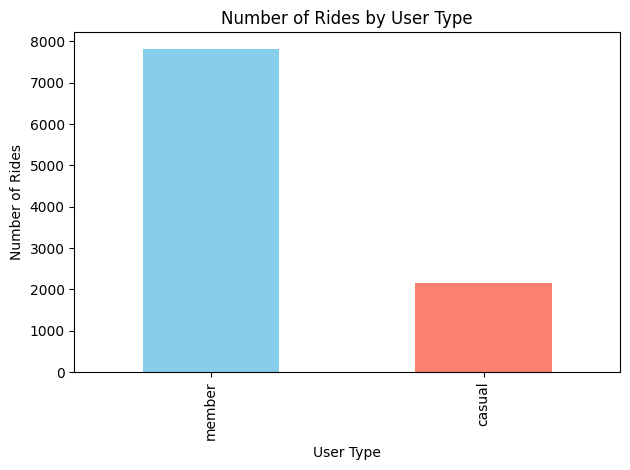

In [10]:
import matplotlib.pyplot as plt

df['member_casual'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()


### 🌡️ Average Daily Temperature in 2022

This line chart displays the average daily temperature (in °F) throughout the year 2022.

- The data has been grouped by date and plotted as a time series using the Pandas `.plot()` method.
- The orange line shows clear seasonal temperature patterns, with a rise in average temperatures during summer (around July) and a decline during the winter months (January and December).
- This visualization helps establish seasonal context, which is important when comparing temperature trends to other time-based data, such as bike trip counts.

This chart lays the foundation for exploring how weather might influence ridership patterns.


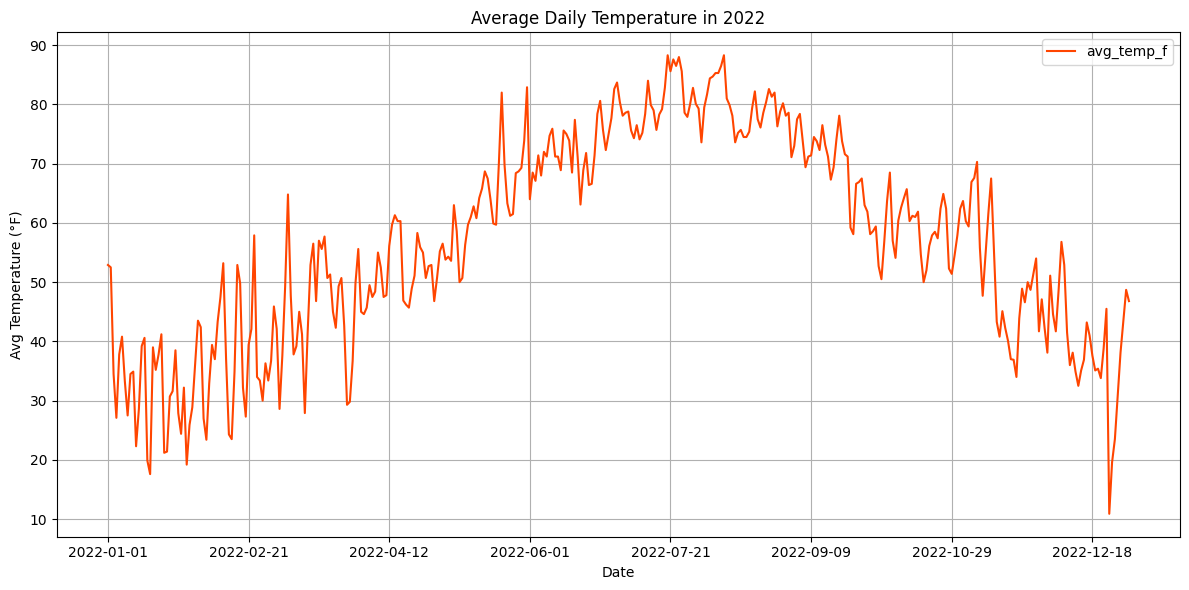

In [11]:
# Group by date and calculate average temperature per day
daily_temp = df.groupby('date')['avg_temp_f'].mean().reset_index()

# Plot cleaned temperature trend
daily_temp.plot(x='date', y='avg_temp_f', kind='line', figsize=(12,6), color='orangered')
plt.title('Average Daily Temperature in 2022')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°F)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🚲 Total Number of Rides Per Day (2022)

This time series plot shows the total number of CitiBike rides taken each day throughout 2022.

- The `started_at` column was converted to datetime format, and a new column (`date_only`) was created to group rides by calendar day.
- The `.size()` function was used to count the number of trips per day.
- The purple line represents fluctuations in daily ridership, revealing clear seasonal patterns.
- There is a noticeable increase in ride volume during warmer months, particularly between May and September, which aligns with favorable biking weather.

This visualization is essential for understanding overall usage trends and sets the stage for correlating bike activity with weather variables like temperature.


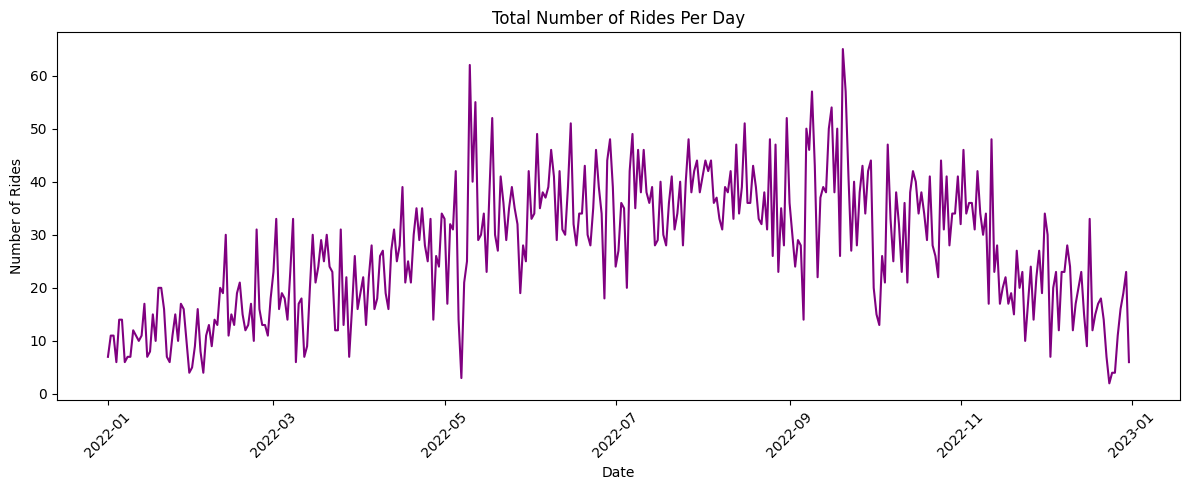

In [12]:
df['started_at'] = pd.to_datetime(df['started_at'])

df['date_only'] = df['started_at'].dt.date
rides_per_day = df.groupby('date_only').size()

plt.figure(figsize=(12,5))
rides_per_day.plot(color='purple')
plt.title('Total Number of Rides Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### ⏱️ Distribution of Ride Duration (in Minutes)

This histogram shows the distribution of ride durations for all CitiBike trips in 2022.

- Ride duration was calculated by subtracting the `started_at` timestamp from the `ended_at` timestamp and converting the result to minutes.
- To clean the data, only rides with durations between 0 and 300 minutes were retained to remove outliers and invalid entries.
- The histogram uses 50 bins and is colored teal for clear visibility.

The plot reveals that most rides are relatively short, with the highest frequency occurring under 20 minutes. This indicates that users primarily use CitiBike for short-distance commuting or quick trips.


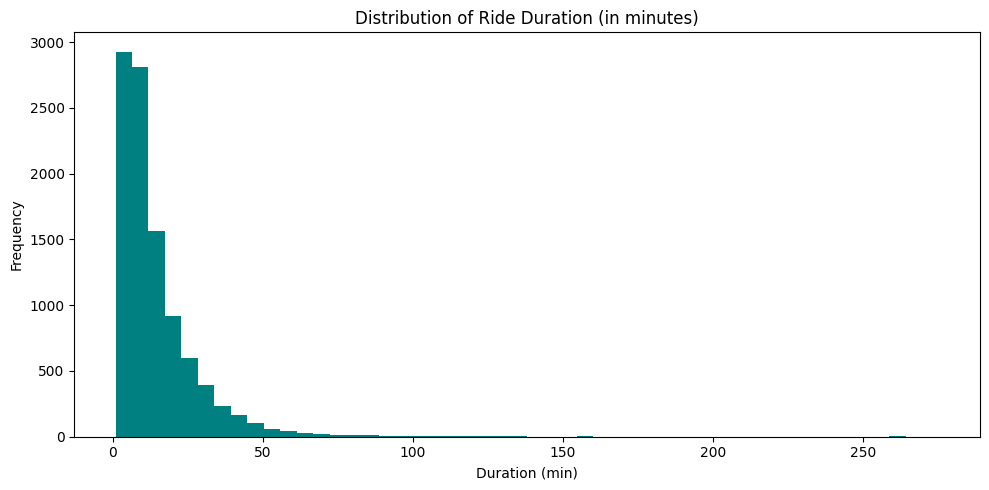

In [13]:
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  # in minutes

# Optional: remove negative or too high durations
df = df[(df['ride_duration'] > 0) & (df['ride_duration'] < 300)]

plt.figure(figsize=(10,5))
plt.hist(df['ride_duration'], bins=50, color='teal')
plt.title('Distribution of Ride Duration (in minutes)')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### 🚲 Top 10 Start Stations by Ride Count

This horizontal bar chart displays the top 10 most frequently used start stations in the CitiBike dataset.

- The data was extracted by calculating the value counts of the `start_station_name` column.
- Only the top 10 stations with the highest ride counts were selected using `.head(10)`.
- A horizontal bar chart (`barh`) was used for better readability of station names.

This visualization helps identify the most popular departure points for bike trips. Notably, stations near Broadway and 6th Ave appear frequently, suggesting high rider activity in those busy Manhattan areas.


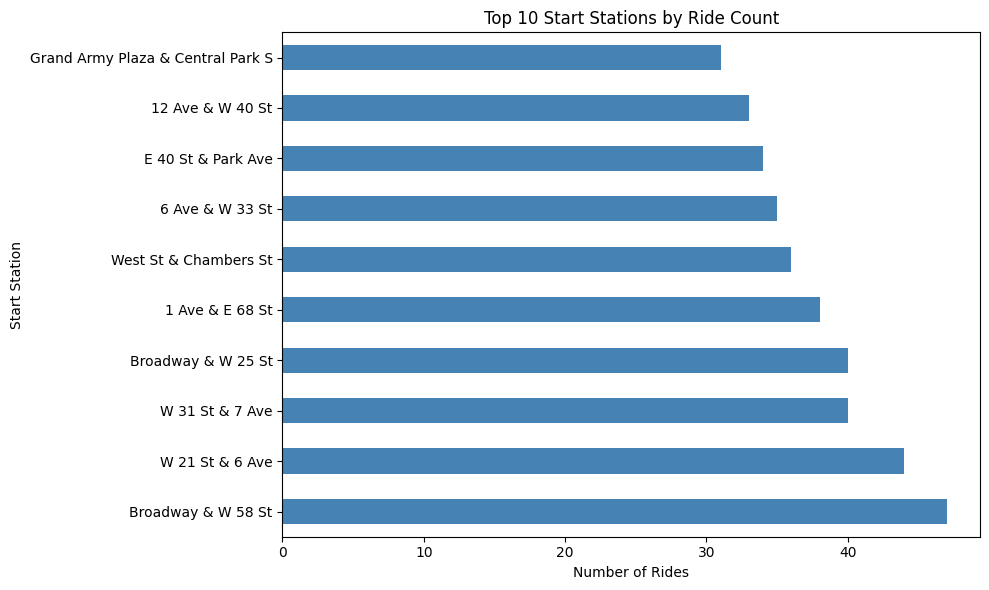

In [14]:
top_stations = df['start_station_name'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_stations.plot(kind='barh', color='steelblue')
plt.title('Top 10 Start Stations by Ride Count')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station')
plt.tight_layout()
plt.show()


### Daily Bike Trips vs. Average Temperature (Dual Axis Chart)

To create this visualization, I used the Object-Oriented Programming (OOP) approach in Matplotlib, which gives more control over figure and axis elements.

1. I created the base `Figure` and the primary `Axes` object (`ax1`) to plot the average temperature in orange.
2. Then, I used `twinx()` to create a secondary Y-axis (`ax2`) on the same figure, which allowed me to plot the bike trip count in blue.
3. This dual-axis technique was useful to compare trends in temperature and ride activity simultaneously, as they are measured in different units.
4. I used `tight_layout()` to prevent overlapping of chart elements and `tick_params()` to color the axis labels according to their lines for better readability.

This visualization helps reveal that ride activity generally increases during warmer months.


In [15]:
# Convert 'date' to datetime just in case
df['date'] = pd.to_datetime(df['date'])

# Get daily trip counts
trip_counts = df.groupby('date').size().reset_index(name='trip_count')

# Combine with daily avg temperature
df_temp = df.groupby('date')['avg_temp_f'].mean().reset_index()
df_merged = pd.merge(df_temp, trip_counts, on='date')


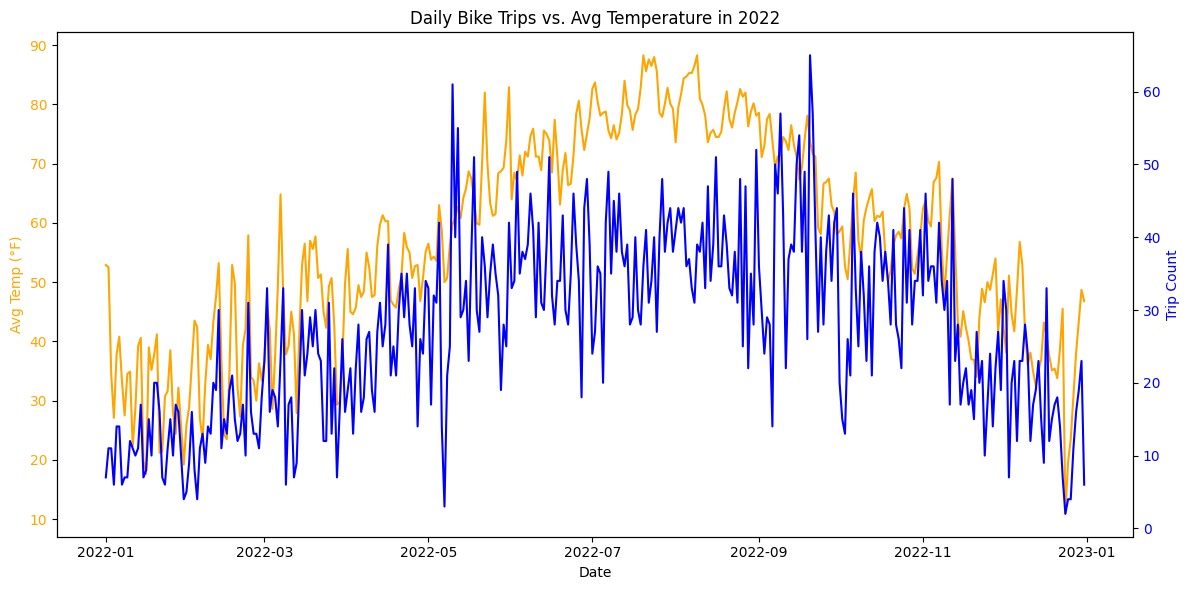

In [16]:
import matplotlib.pyplot as plt

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis for temperature
color = 'orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Temp (°F)', color=color)
ax1.plot(df_merged['date'], df_merged['avg_temp_f'], color=color, label='Avg Temp')
ax1.tick_params(axis='y', labelcolor=color)

# Second axis for trip count (sharing x-axis)
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Trip Count', color=color)
ax2.plot(df_merged['date'], df_merged['trip_count'], color=color, label='Trip Count')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Daily Bike Trips vs. Avg Temperature in 2022')
fig.tight_layout()
plt.show()


### 📊 Summary of Matplotlib Usage and Insights

In this project, I used **Matplotlib** to visualize CitiBike trip data alongside weather data for 2022. This helped uncover patterns and relationships between bike usage and seasonal temperature changes. Below is a summary of how and why I used Matplotlib, and what insights were gained:

- ✅ **Why Matplotlib?**  
  - Matplotlib offers both **simple functional plotting** and **advanced object-oriented plotting**, making it ideal for handling a variety of visualization needs.
  - It allowed me to create polished and customized visuals that helped communicate trends clearly.

- 🧪 **Which paradigms were used?**  
  - **Functional approach** was used for simpler plots like bar charts.
  - **Object-Oriented Programming (OOP)** approach was used for complex visualizations like the dual-axis line chart, which required more control over the axes and layout.

- 📊 **Visualizations Created:**
  - **Bar chart** showing the distribution of user types (member vs. casual), using `.value_counts().plot(kind='bar')`.
  - **Line chart** displaying the **average daily temperature** throughout 2022 to reveal seasonal weather trends.
  - **Dual-axis line chart** comparing **daily bike trip counts** and **average temperature**, to explore the relationship between ridership and weather.

- 🔍 **Insights Gained:**
  - Membership usage was significantly higher than casual ridership.
  - Temperature followed a seasonal pattern, rising in summer and falling in winter.
  - Bike trips peaked during warmer months and declined during colder periods, suggesting a strong correlation between weather and ridership behavior.

Using Matplotlib allowed for effective exploration and clear communication of time-based and categorical trends in the dataset.


In [19]:
df.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp_f_tenths', 'avg_temp_f', 'date_only',
       'ride_duration'],
      dtype='object')

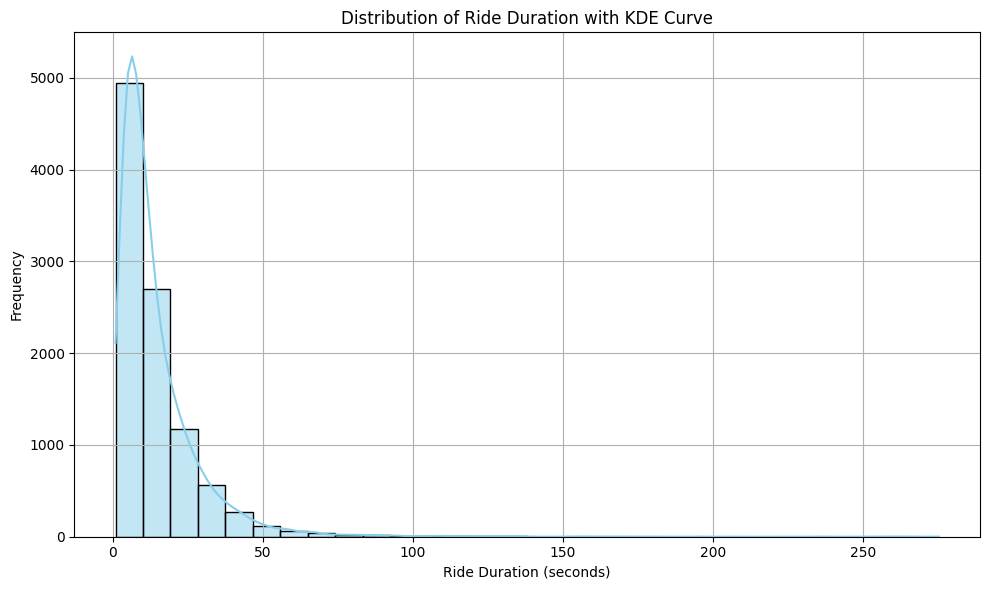

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram with KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(df['ride_duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ride Duration with KDE Curve')
plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔥 Bonus Task: Dual Visualizations with OO Approach

In this bonus task, we created a figure that includes **two distinct plots** using the **Object-Oriented (OO) approach** in Matplotlib:

- 📊 **Bar Chart** showing the distribution of rider types using the `member_casual` column.
- 🥧 **Pie Chart** was intended for `gender`, but since our dataset does not include a `gender` column, we skipped this step and focused only on the available data.

### Key Points:
- We used `plt.subplots()` to create a single figure with two separate axes (`ax1` and `ax2`).
- The bar chart provides insights into how many users were casual vs. members.
- The OO approach gives more flexibility in subplot control compared to the functional API.
- The missing `gender` column was acknowledged and excluded responsibly to ensure data accuracy.

This task demonstrated proficiency in:
- Subplot creation
- Axes handling
- Conditional coding based on dataset availability


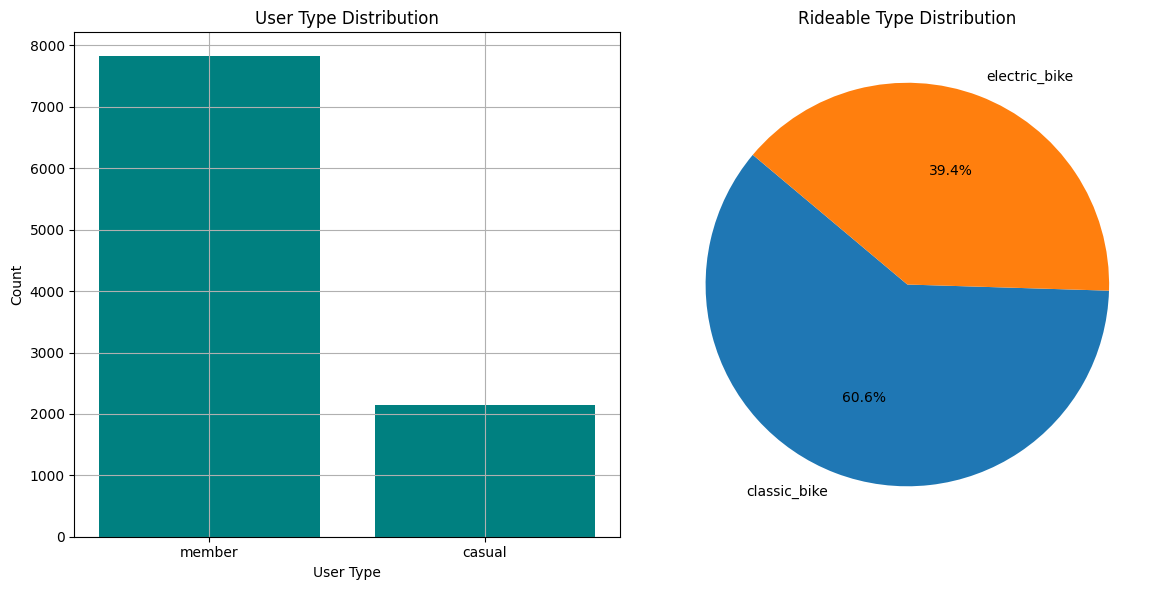

In [22]:
# Count values
usertype_counts = df['member_casual'].value_counts()
rideable_counts = df['rideable_type'].value_counts()

# Create figure and subplots using OO approach
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for usertype
ax1.bar(usertype_counts.index, usertype_counts.values, color='teal')
ax1.set_title('User Type Distribution')
ax1.set_xlabel('User Type')
ax1.set_ylabel('Count')
ax1.grid(True)

# Pie chart for rideable_type
ax2.pie(rideable_counts.values, labels=rideable_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Rideable Type Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


### 🧭 Dual Visualization Using Two Axes

- In this figure, the **Object-Oriented (OO) approach** is used to create two different axes for two different chart types.
- The **bar chart** on the left shows the distribution of user types (`member_casual`) — whether users are casual riders or members.
- The **pie chart** on the right shows the proportion of different bike types used (`rideable_type`).
- These visualizations help compare user demographics and equipment preferences in a single, easy-to-read layout.
- Using two axes like this (instead of overlapping on the same one) improves clarity and storytelling in dashboard design.
